# Math 104B Homework 1
**Name.** <span style="color:red">Kelly Wang</span> <br>
**Id.** <span style="color:red">5351010</span>

## Exercise 1
In the cell below I will implement the algorithm for Gaussian Elimination with Backward Substitution for the solution $\mathbf{Ax=b}$ and run the appropriate tests.

#### 1a
My numbers for 1a look reasonable and correct because the difference between the randomly generated x and the x found through gaussian elimination and backward substitution is almost 0.


#### 1b
My numbers for 1b look reasonable and correct because the difference between the np.linalg.solve generated x and the x found through gaussian elimination and backward substitution is almost 0. 

#### 1c
This is scaled by k because the time for each type of computation is scaled by the size of our matrix which gets determined by k. From the graph, we can see that our solution with Gaussian Elimination and backward substitution is much slower than python's np.linalg.solve(). 

1a: The following are the errors for Ax = b where A and x are randomly generated for k = 0, 1,..., 6.

k = 0  :  1.6653345369377348e-16 

k = 1  :  5.2562121322097255e-16 

k = 2  :  1.1102230246251565e-15 

k = 3  :  3.524958103184872e-15 

k = 4  :  1.5751289161869408e-14 

k = 5  :  8.200662371393719e-13 

k = 6  :  1.524546044961994e-10 

1b: The following are the errors for Ax=b where A and b are randomly generated for k = 0, 1,..., 6. 

k = 0  :  5.551115123125783e-17 

k = 1  :  4.163336342344337e-17 

k = 2  :  8.326672684688674e-17 

k = 3  :  1.942890293094024e-16 

k = 4  :  1.0269562977782698e-15 

k = 5  :  4.2021941482062175e-13 

k = 6  :  4.539870701592008e-10 



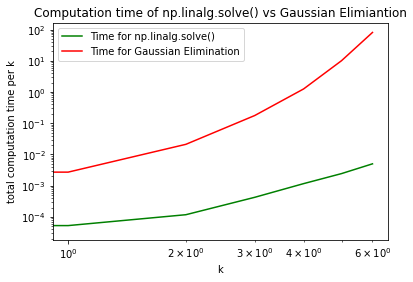

In [6]:
#code for matrix, Gaussian Elimination, Backward Substitution 
import numpy as np
import matplotlib.pyplot as plt
import timeit
import time
#matrix 
def matrix(k):
    n = 10*(2**k)
    A = 4.0*np.identity(n) + np.random.rand(n,n)
    x = np.random.rand(n)
    b = A.dot(x)
    return A, b, x, n

# Gaussian Elimination
def gaussian_elimination(A, b):
    n = len(A)
    m = len(A[0])
    for i in range(n-1):
        for j in range(i+1, n):
            m = A[j][i]/A[i][i]
            for k in range(i+1, n):
                A[j][k] = A[j][k] - m*A[i][k]
            b[j] = b[j] - m*b[i]
    return A, b


# Backward Susbstitution 
def backward_sub(U, y):
    n = len(U)
    m = len(U[0])
    x = np.zeros(n)
    x[n-1] = b[n-1]/U[n-1][n-1]
    for i in range(n-2, -1, -1):
        summation = 0
        for j in range(i+1, n):
            summation += U[i][j]*x[j]
        x[i] = (b[i] - summation)/U[i][i]
    return x


print("1a: The following are the errors for Ax = b where A and x are randomly generated for k = 0, 1,..., 6.\n")
for i in range(0,7):
    A, b, x, junk1 = matrix(i)
    U, y = gaussian_elimination(A, b)
    x_back = backward_sub(U, y)
    print("k =", i, " : ", max(abs(x-x_back)), '\n')
    
print("1b: The following are the errors for Ax=b where A and b are randomly generated for k = 0, 1,..., 6. \n")
for i in range(0,7):
    A, junk1, junk2, n = matrix(i)
    b = np.random.rand(n)
    x = np.linalg.solve(A, b)
    U, y = gaussian_elimination(A, b)
    x_back = backward_sub(U, y)
    print("k =", i, " : ", max(abs(x-x_back)), '\n')

#for 1c
linalg_timer = []
gaussian_timer = []
for i in range(0, 7):
    A, junk1, junk2, n = matrix(i)
    b = np.random.rand(n)
    start1 = time.time()
    x = np.linalg.solve(A,b)
    linalg_timer.append(time.time() - start1)
    
    start2 = time.time()
    U,y = gaussian_elimination(A, b)
    x_back = backward_sub(U, y)
    gaussian_timer.append(time.time() - start2)
    
k = np.arange(7)
plt.loglog(k, linalg_timer, label = "Time for np.linalg.solve()", color = 'green')
plt.loglog(k, gaussian_timer, label = "Time for Gaussian Elimination", color = 'red')
plt.xlabel("k")
plt.ylabel("total computation time per k")
plt.title("Computation time of np.linalg.solve() vs Gaussian Elimiantion")
plt.legend()


## Exercise 2
#### (2a)
Using the given Fredholm integral equation of second kind, let's subsitute the equation with the provided $a, b, f(x)$ and let $u(t) = t^2$. 
$$u(x) = 3x^2 + 4 - 2e^x - e^{1-x} + \int_{0}^{1}e^{|x-t|}t^2dt$$
We need to seperate the absolute values to integrate.
$$u(x) = 3x^2 + 4 - 2e^x - e^{1-x} + \int_{0}^{x}e^{(x-t)}t^2dt + \int{x}{1}e^{(t-x)}t^2dt$$ <br/><br/>

$\int_{0}^{x}e^{x-t}t^2dt$
> $ = e^x \int_{0}^{x}\frac{t^2}{e^t}dt$ <br/> $ = e^x[2-e^{-x}(x^2+2x+2)]$ <br/> $ = 2e^x-(x^2+2x+2)$

$\int_{x}^{1}e^{t-x}t^2dt$
> $ = \frac{1}{e^x}\int_{x}{1}e^tt^2dt$ <br/> $ = (-x^2+2x-2)+\frac{e}{e^x}$ <br/> $ = (-x^2+2x-2)+ e^{1-x}$

Now combine with the rest of the equation:
$$u(x) = 3x^2 + 4 - 2e^x - e^{1-x} + 2e^x-(x^2+2x+2) +(-x^2+2x-2)+ e^{1-x}$$

Simplify, and we have $u(x) = x^2$

#### (2b)
In the cell below I will attempt at 2b

In [16]:
m = [10, 20, 40, 80, 160];

f = lambda x: 3*(x**2) + 4 - 2*np.exp(x) - np.exp(1-x)
K = lambda x,t: np.exp(np.abs(x-t))

def matrix_A(n):
    A = np.zeros((n,n))
    b = np.random.rand(n)
    x = np.linspace(0,1,n)
    h = 1/n
    for i in range(n):
        for j in range(n):
            if j == 0 or j == m:
                A[i,j] = -h/2 * K(x[i], x[j])
            else:
                A[i,j] = -h*K(x[i], x[j])
        A[i,i] = A[i,i] + 1
        b[i] = f(x[i])
    return A, b, x, h

errors = []
for k in range(len(m)):
    A, b, x, h = matrix_A(m[k]+1)
    U, y = gaussian_elimination(A, b)
    estimate = backward_sub(U, y)
    our_u = x**2
    errors.append(max(abs(our_u - estimate)))
    
print("Errors from approximating using gaussian elmination and backward substitution \n")
for i in range(len(m)):
    print("m = ", m[i], " : ", errors[i], '\n')


Errors from approximating using gaussian elmination and backward substitution 

m =  10  :  0.1263236691832471 

m =  20  :  0.06393896038513947 

m =  40  :  0.03215687466537598 

m =  80  :  0.016124526621963398 

m =  160  :  0.008073697917371891 

